In [24]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime


import matplotlib.pyplot as plt

In [25]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79d7a89f22cdb95a08fb0f49039f8811


In [26]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

598

In [27]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [28]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [29]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | daxian
City not found. Skipping...
Processing Record 3 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 4 of Set 1 | rocha
Processing Record 5 of Set 1 | naze
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | hithadhoo
Processing Record 8 of Set 1 | peniche
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | geresk
City not found. Skipping...
Processing Record 12 of Set 1 | castelbuono
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | zhicheng
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | saint-philippe
Processing Record 17 of Set 1 | jiddah
City not found. Skipping...
Processing Record 18 of Set 1 | zhmerynka
Processing Record 19 of Set 1 | boguchar
Processing Record 20 of Set 1 | pocoes
Processing Record 21 of

Processing Record 39 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 40 of Set 4 | mackenzie
Processing Record 41 of Set 4 | hermanus
Processing Record 42 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 43 of Set 4 | lavrentiya
Processing Record 44 of Set 4 | acapulco
Processing Record 45 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 46 of Set 4 | fort nelson
Processing Record 47 of Set 4 | shache
Processing Record 48 of Set 4 | nacogdoches
Processing Record 49 of Set 4 | fernandina beach
Processing Record 50 of Set 4 | bitung
Processing Record 1 of Set 5 | lagoa
Processing Record 2 of Set 5 | sioux lookout
Processing Record 3 of Set 5 | maryville
Processing Record 4 of Set 5 | saskylakh
Processing Record 5 of Set 5 | klaksvik
Processing Record 6 of Set 5 | labuhan
Processing Record 7 of Set 5 | zabid
Processing Record 8 of Set 5 | sawakin
Processing Record 9 of Set 5 | carutapera
Processing Record 10 of Set 5 | airai
Processi

Processing Record 21 of Set 8 | nargana
Processing Record 22 of Set 8 | port-cartier
Processing Record 23 of Set 8 | alta floresta
Processing Record 24 of Set 8 | port hedland
Processing Record 25 of Set 8 | pangoa
Processing Record 26 of Set 8 | omboue
Processing Record 27 of Set 8 | kirakira
Processing Record 28 of Set 8 | avarua
Processing Record 29 of Set 8 | lolua
City not found. Skipping...
Processing Record 30 of Set 8 | longlac
City not found. Skipping...
Processing Record 31 of Set 8 | sarangani
Processing Record 32 of Set 8 | bibiani
Processing Record 33 of Set 8 | oksfjord
Processing Record 34 of Set 8 | padang
Processing Record 35 of Set 8 | hebertville
City not found. Skipping...
Processing Record 36 of Set 8 | pathein
Processing Record 37 of Set 8 | wahran
City not found. Skipping...
Processing Record 38 of Set 8 | remedios
Processing Record 39 of Set 8 | isangel
Processing Record 40 of Set 8 | shu
Processing Record 41 of Set 8 | feira de santana
Processing Record 42 of S

Processing Record 11 of Set 12 | babanusah
City not found. Skipping...
Processing Record 12 of Set 12 | capim grosso
Processing Record 13 of Set 12 | mogadishu
Processing Record 14 of Set 12 | sao paulo do potengi
Processing Record 15 of Set 12 | shimoda
Processing Record 16 of Set 12 | tshikapa
Processing Record 17 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 18 of Set 12 | atlantic city
Processing Record 19 of Set 12 | barsovo
Processing Record 20 of Set 12 | muroto
Processing Record 21 of Set 12 | sokoto
Processing Record 22 of Set 12 | bathurst
Processing Record 23 of Set 12 | zabol
Processing Record 24 of Set 12 | kargopol
Processing Record 25 of Set 12 | seoul
Processing Record 26 of Set 12 | miri
Processing Record 27 of Set 12 | fort-shevchenko
Processing Record 28 of Set 12 | marsabit
Processing Record 29 of Set 12 | praya
Processing Record 30 of Set 12 | mawlaik
Processing Record 31 of Set 12 | casper
Processing Record 32 of Set 12 | viransehir
Processin

In [30]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,72.93,86,77,17.02,PF,2021-10-31 23:23:10
1,Rocha,-34.4833,-54.3333,63.36,98,93,6.24,UY,2021-10-31 23:28:01
2,Naze,28.3667,129.4833,67.12,79,95,14.97,JP,2021-10-31 23:28:02
3,Hobart,-42.8794,147.3294,60.03,58,75,3.00,AU,2021-10-31 23:27:04
4,Hithadhoo,-0.6000,73.0833,82.33,76,100,18.79,MV,2021-10-31 23:28:03
5,Peniche,39.3558,-9.3811,71.73,95,97,20.92,PT,2021-10-31 23:28:03
6,Mataura,-46.1927,168.8643,61.66,42,74,10.40,NZ,2021-10-31 23:28:03
7,Kapaa,22.0752,-159.3190,83.12,75,20,3.00,US,2021-10-31 23:28:04
8,Castelbuono,37.9320,14.0886,58.41,89,100,5.28,IT,2021-10-31 23:28:05
9,Jamestown,42.0970,-79.2353,53.19,84,90,11.01,US,2021-10-31 23:24:48


In [37]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [39]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [40]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

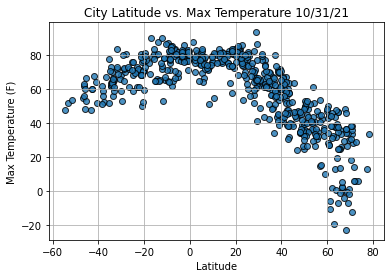

In [41]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

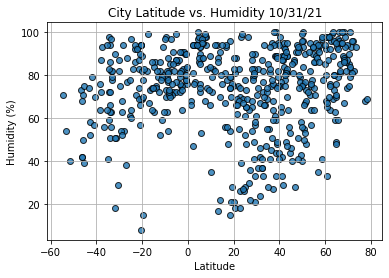

In [42]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

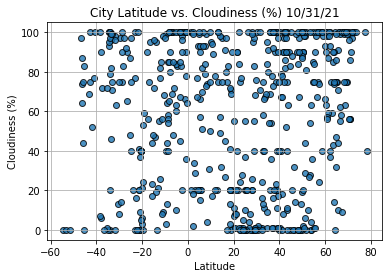

In [43]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

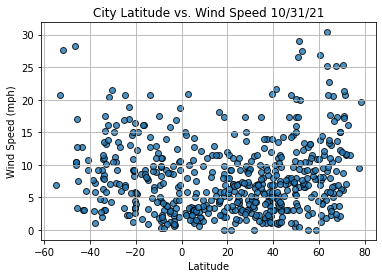

In [44]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [45]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

SyntaxError: unexpected EOF while parsing (<ipython-input-45-d58af2435033>, line 3)

In [46]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

NameError: name 'northern_hemi_df' is not defined

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for Maximum Temperature', 'Max Temp',(-50,90))

SyntaxError: EOL while scanning string literal (<ipython-input-48-8677a9d312d4>, line 6)

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

NameError: name 'northern_hemi_df' is not defined

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for % Humidity', '% Humidity',(-50,15))

SyntaxError: EOL while scanning string literal (<ipython-input-50-9c3e8b244753>, line 6)

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for % Cloudiness', '% Cloudiness',(-50,60))

SyntaxError: EOL while scanning string literal (<ipython-input-51-3dc99b339452>, line 6)

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n
                        for Wind Speed', 'Wind Speed',(40,35))

SyntaxError: EOL while scanning string literal (<ipython-input-52-7024af74f12d>, line 6)

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for Wind Speed', 'Wind Speed',(-50,35))

SyntaxError: EOL while scanning string literal (<ipython-input-53-8c4f0e57bb27>, line 6)